In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from functools import partial
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import keras
from keras.models import load_model



In [39]:
# Cargar el archivo NPY
intervals = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_1601.npy')
intervals_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_ref_1601.npy')
labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_1601.npy')
labels_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_ref_1601.npy')
test_intervals_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_intervals_1601.npy')
test_labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_labels_1601.npy')
x_out_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_1601.npy')
x_out_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_ref_1601.npy')
x_out_1601_test = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_test_1601.npy')

In [40]:
def filter_cwt(X, thr):
    X_copy = X.copy()
    X_copy[X_copy < thr] = 0
    return X_copy

In [41]:
thr = 0.1
x_out_1601 = filter_cwt(x_out_1601, thr)
x_out_1601_test = filter_cwt(x_out_1601_test, thr)
x_out_1601_ref = filter_cwt(x_out_1601_ref, thr)

In [42]:

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
labels_1601_categorical = label_encoder.fit_transform(labels_1601)
labels_1601_categorical_test = label_encoder.transform(test_labels_1601)

**Intervalo de 050_080**

In [43]:
positions_050_080 = np.where(intervals == "050_080")[0]
test_positions_050_080 = np.where(test_intervals_1601 == "050_080")[0]

In [44]:
x_out_050_080 = x_out_1601[positions_050_080]
labels_050_080 = labels_1601_categorical[positions_050_080]

x_out_test_050_080 = x_out_1601_test[test_positions_050_080]
labels_test_050_080 = labels_1601_categorical_test[test_positions_050_080]

In [45]:
# Crear un DataFrame
df = pd.DataFrame({'labels_1601': labels_050_080})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df['category'] = pd.factorize(list(zip(df['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_train_a_position = np.array(positions_by_category, dtype=object)
x_train_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_train_a_position = [item for sublist in x_train_a_position for item in sublist]
indices_x_train_b_position = [item for sublist in x_train_b_position for item in sublist]

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\269943442.py:5: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['category'] = pd.factorize(list(zip(df['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\269943442.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [46]:
# Crear un DataFrame
df2 = pd.DataFrame({'labels_1601': labels_test_050_080})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df2['category'] = pd.factorize(list(zip(df2['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df2.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_test_a_position = np.array(positions_by_category, dtype=object)
x_test_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_test_a_position = [item for sublist in x_test_a_position for item in sublist]
indices_x_test_b_position = [item for sublist in x_test_b_position for item in sublist]

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\1872857217.py:5: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df2['category'] = pd.factorize(list(zip(df2['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\1872857217.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df2.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [47]:
# Reordenar los datasets según los índices proporcionados
x_train = x_out_050_080[indices_x_train_a_position]
x_train_b = x_out_050_080[indices_x_train_b_position]
x_test =x_out_test_050_080[indices_x_test_a_position]
x_test_b = x_out_test_050_080[indices_x_test_b_position]

# Recortar un píxel de la parte superior de cada imagen en todos los datasets
x_train = x_train[:, 1:1601, :, :]
x_train_b = x_train_b[:, 1:1601, :, :]
x_test = x_test[:, 1:1601, :, :]
x_test_b = x_test_b[:, 1:1601, :, :]

In [48]:
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de x_train_b:", x_train_b.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de x_test_b:", x_test_b.shape)

# Normalizar los datos de entrenamiento y prueba
x_train = x_train.astype('float32') / 255.0
x_train_b = x_train_b.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_b = x_test_b.astype('float32') / 255.0

Dimensiones de x_train: (1600, 1600, 128, 1)
Dimensiones de x_train_b: (1600, 1600, 128, 1)
Dimensiones de x_test: (800, 1600, 128, 1)
Dimensiones de x_test_b: (800, 1600, 128, 1)


In [49]:

# Función para construir el autoencoder (preentrenado)
def build_autoencoder():
    input_img = Input(shape=(1600, 128, 1))

    # Encoder
    x = Conv2D(32, (3, 3), padding='same')(input_img)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder


Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0215 
Epoch 1: val_loss improved from inf to 0.01818, saving model to autoencoder_retrained_050_080.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 846s 17s/step - loss: 0.0215 - val_loss: 0.0182 - learning_rate: 2.5000e-04
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0212 
Epoch 2: val_loss did not improve from 0.01818
50/50 ━━━━━━━━━━━━━━━━━━━━ 816s 16s/step - loss: 0.0212 - val_loss: 0.0185 - learning_rate: 2.5000e-04
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - loss: 0.0216 
Epoch 3: val_loss did not improve from 0.01818
50/50 ━━━━━━━━━━━━━━━━━━━━ 715s 14s/step - loss: 0.0216 - val_loss: 0.0183 - learning_rate: 2.5000e-04
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - loss: 0.0213 
Epoch 4: val_loss improved from 0.01818 to 0.01810, saving model to autoencoder_retrained_050_080.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 708s 14s/step - loss: 0.0213 - val_loss: 0.0181 - learning_rate: 2.5000e-04
Epoch 5/25
50/50 ━━━━━━━━━

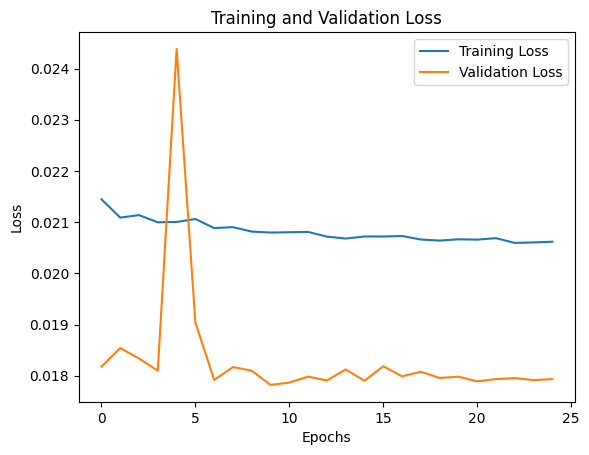

In [50]:
# Cargar el modelo preentrenado
autoencoder = load_model('autoencoder_filtred_train.keras')

# Configuración del entrenamiento del autoencoder con los nuevos datos
callbacks = [
    ModelCheckpoint('autoencoder_retrained_050_080.keras', verbose=1, save_best_only=True, save_weights_only=False),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

history = autoencoder.fit(
    x=x_train,
    y=x_train_b,
    epochs=25,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test_b),
    callbacks=callbacks
)

# Evaluación del modelo en el conjunto de prueba
test_loss = autoencoder.evaluate(x_test, x_test_b)
print("Test loss (MSE):", test_loss)

# Plotting training and validation losses
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Intervalo de 080_110**

In [51]:
positions_080_110 = np.where(intervals == "080_110")[0]
test_positions_080_110 = np.where(test_intervals_1601 == "080_110")[0]

x_out_080_110 = x_out_1601[positions_080_110]
labels_080_110 = labels_1601_categorical[positions_080_110]

x_out_test_080_110 = x_out_1601_test[test_positions_080_110]
labels_test_080_110 = labels_1601_categorical_test[test_positions_080_110]

In [52]:
# Crear un DataFrame
df = pd.DataFrame({'labels_1601': labels_080_110})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df['category'] = pd.factorize(list(zip(df['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_train_a_position = np.array(positions_by_category, dtype=object)
x_train_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_train_a_position = [item for sublist in x_train_a_position for item in sublist]
indices_x_train_b_position = [item for sublist in x_train_b_position for item in sublist]

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\2532886283.py:5: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['category'] = pd.factorize(list(zip(df['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\2532886283.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [53]:
# Crear un DataFrame
df2 = pd.DataFrame({'labels_1601': labels_test_080_110})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df2['category'] = pd.factorize(list(zip(df2['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df2.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_test_a_position = np.array(positions_by_category, dtype=object)
x_test_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_test_a_position = [item for sublist in x_test_a_position for item in sublist]
indices_x_test_b_position = [item for sublist in x_test_b_position for item in sublist]

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\104337315.py:5: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df2['category'] = pd.factorize(list(zip(df2['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\104337315.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df2.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [54]:
# Reordenar los datasets según los índices proporcionados
x_train = x_out_080_110[indices_x_train_a_position]
x_train_b = x_out_080_110[indices_x_train_b_position]
x_test =x_out_test_080_110[indices_x_test_a_position]
x_test_b = x_out_test_080_110[indices_x_test_b_position]

# Recortar un píxel de la parte superior de cada imagen en todos los datasets
x_train = x_train[:, 1:1601, :, :]
x_train_b = x_train_b[:, 1:1601, :, :]
x_test = x_test[:, 1:1601, :, :]
x_test_b = x_test_b[:, 1:1601, :, :]

In [55]:
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de x_train_b:", x_train_b.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de x_test_b:", x_test_b.shape)

# Normalizar los datos de entrenamiento y prueba
x_train = x_train.astype('float32') / 255.0
x_train_b = x_train_b.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_b = x_test_b.astype('float32') / 255.0

Dimensiones de x_train: (1600, 1600, 128, 1)
Dimensiones de x_train_b: (1600, 1600, 128, 1)
Dimensiones de x_test: (800, 1600, 128, 1)
Dimensiones de x_test_b: (800, 1600, 128, 1)


Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - loss: 0.0213 
Epoch 1: val_loss improved from inf to 0.01523, saving model to autoencoder_retrained_080_110.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 904s 18s/step - loss: 0.0213 - val_loss: 0.0152 - learning_rate: 2.5000e-04
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0209 
Epoch 2: val_loss did not improve from 0.01523
50/50 ━━━━━━━━━━━━━━━━━━━━ 801s 16s/step - loss: 0.0209 - val_loss: 0.0175 - learning_rate: 2.5000e-04
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - loss: 0.0211 
Epoch 3: val_loss did not improve from 0.01523
50/50 ━━━━━━━━━━━━━━━━━━━━ 784s 16s/step - loss: 0.0210 - val_loss: 0.0156 - learning_rate: 2.5000e-04
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0214 
Epoch 4: val_loss did not improve from 0.01523
50/50 ━━━━━━━━━━━━━━━━━━━━ 783s 16s/step - loss: 0.0214 - val_loss: 0.0167 - learning_rate: 2.5000e-04
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0208 
Epoch 5: val_loss

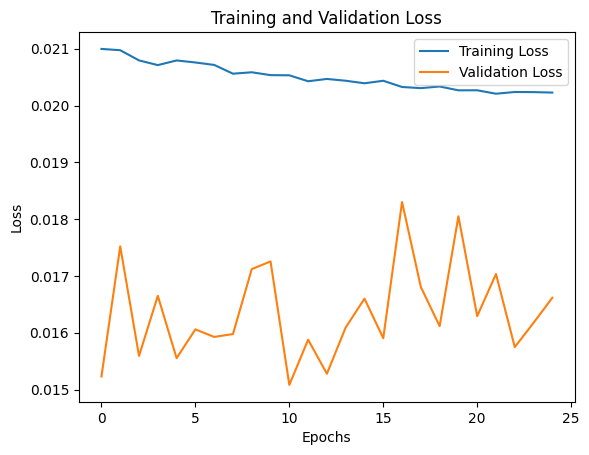

In [56]:

# Cargar el modelo preentrenado
autoencoder = load_model('autoencoder_filtred_train.keras')

# Configuración del entrenamiento del autoencoder con los nuevos datos
callbacks = [
    ModelCheckpoint('autoencoder_retrained_080_110.keras', verbose=1, save_best_only=True, save_weights_only=False),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

history = autoencoder.fit(
    x=x_train,
    y=x_train_b,
    epochs=25,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test_b),
    callbacks=callbacks
)

# Evaluación del modelo en el conjunto de prueba
test_loss = autoencoder.evaluate(x_test, x_test_b)
print("Test loss (MSE):", test_loss)

# Plotting training and validation losses
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Intervalo de 110_140**

In [57]:
positions_110_140 = np.where(intervals == "110_140")[0]
test_positions_110_140 = np.where(test_intervals_1601 == "110_140")[0]

x_out_110_140 = x_out_1601[positions_110_140]
labels_110_140 = labels_1601_categorical[positions_110_140]

x_out_test_110_140 = x_out_1601_test[test_positions_110_140]
labels_test_110_140 = labels_1601_categorical_test[test_positions_110_140]

In [58]:
# Crear un DataFrame
df = pd.DataFrame({'labels_1601': labels_110_140})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df['category'] = pd.factorize(list(zip(df['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_train_a_position = np.array(positions_by_category, dtype=object)
x_train_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_train_a_position = [item for sublist in x_train_a_position for item in sublist]
indices_x_train_b_position = [item for sublist in x_train_b_position for item in sublist]

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\2734231919.py:5: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['category'] = pd.factorize(list(zip(df['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\2734231919.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [59]:
# Crear un DataFrame
df2 = pd.DataFrame({'labels_1601': labels_test_110_140})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df2['category'] = pd.factorize(list(zip(df2['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df2.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_test_a_position = np.array(positions_by_category, dtype=object)
x_test_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_test_a_position = [item for sublist in x_test_a_position for item in sublist]
indices_x_test_b_position = [item for sublist in x_test_b_position for item in sublist]

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\3617647781.py:5: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df2['category'] = pd.factorize(list(zip(df2['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_19384\3617647781.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df2.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [60]:
# Reordenar los datasets según los índices proporcionados
x_train = x_out_110_140[indices_x_train_a_position]
x_train_b = x_out_110_140[indices_x_train_b_position]
x_test =x_out_test_110_140[indices_x_test_a_position]
x_test_b = x_out_test_110_140[indices_x_test_b_position]

# Recortar un píxel de la parte superior de cada imagen en todos los datasets
x_train = x_train[:, 1:1601, :, :]
x_train_b = x_train_b[:, 1:1601, :, :]
x_test = x_test[:, 1:1601, :, :]
x_test_b = x_test_b[:, 1:1601, :, :]

In [61]:
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de x_train_b:", x_train_b.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de x_test_b:", x_test_b.shape)

# Normalizar los datos de entrenamiento y prueba
x_train = x_train.astype('float32') / 255.0
x_train_b = x_train_b.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_b = x_test_b.astype('float32') / 255.0

Dimensiones de x_train: (1600, 1600, 128, 1)
Dimensiones de x_train_b: (1600, 1600, 128, 1)
Dimensiones de x_test: (800, 1600, 128, 1)
Dimensiones de x_test_b: (800, 1600, 128, 1)


Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - loss: 0.0284 
Epoch 1: val_loss improved from inf to 0.02009, saving model to autoencoder_retrained_110_140.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 849s 17s/step - loss: 0.0284 - val_loss: 0.0201 - learning_rate: 2.5000e-04
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0282 
Epoch 2: val_loss did not improve from 0.02009
50/50 ━━━━━━━━━━━━━━━━━━━━ 831s 17s/step - loss: 0.0282 - val_loss: 0.0206 - learning_rate: 2.5000e-04
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - loss: 0.0283 
Epoch 3: val_loss improved from 0.02009 to 0.01781, saving model to autoencoder_retrained_110_140.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 873s 17s/step - loss: 0.0283 - val_loss: 0.0178 - learning_rate: 2.5000e-04
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - loss: 0.0292 
Epoch 4: val_loss did not improve from 0.01781
50/50 ━━━━━━━━━━━━━━━━━━━━ 945s 19s/step - loss: 0.0292 - val_loss: 0.0182 - learning_rate: 2.5000e-04
Epoch 5/25
50/50 ━━━━━━━━━

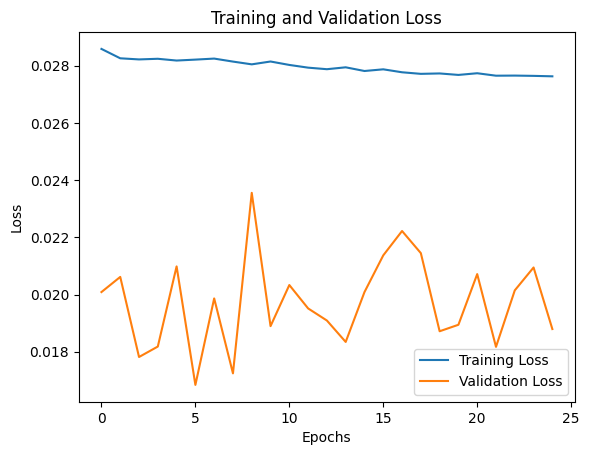

In [62]:

# Cargar el modelo preentrenado
autoencoder = load_model('autoencoder_filtred_train.keras')

# Configuración del entrenamiento del autoencoder con los nuevos datos
callbacks = [
    ModelCheckpoint('autoencoder_retrained_110_140.keras', verbose=1, save_best_only=True, save_weights_only=False),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

history = autoencoder.fit(
    x=x_train,
    y=x_train_b,
    epochs=25,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test_b),
    callbacks=callbacks
)

# Evaluación del modelo en el conjunto de prueba
test_loss = autoencoder.evaluate(x_test, x_test_b)
print("Test loss (MSE):", test_loss)

# Plotting training and validation losses
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Ahora probaremos el clasificador**

In [63]:
# Cargar los modelos
model_050_080 = tf.keras.models.load_model('C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks/autoencoder_retrained_050_080.keras')
model_080_110 = tf.keras.models.load_model('C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks/autoencoder_retrained_080_110.keras')
model_110_140 = tf.keras.models.load_model('C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks/autoencoder_retrained_110_140.keras')

x_out_test_050_080 = x_out_test_050_080[:, 1:1601, :, :]
x_out_test_080_110 = x_out_test_080_110[:, 1:1601, :, :]
x_out_test_110_140 = x_out_test_110_140[:, 1:1601, :, :]
x_out_050_080 = x_out_050_080[:, 1:1601, :, :]
x_out_080_110 = x_out_080_110[:, 1:1601, :, :]
x_out_110_140 = x_out_110_140[:, 1:1601, :, :]

# Generar predicciones
predictions_train_050_80 = model_050_080.predict(x_out_050_080)
predictions_train_080_110 = model_080_110.predict(x_out_080_110)
predictions_train_110_140 = model_110_140.predict(x_out_110_140)
predictions_test_050_080 = model_050_080.predict(x_out_test_050_080)
predictions_test_080_110 = model_080_110.predict(x_out_test_080_110)
predictions_test_110_140 = model_110_140.predict(x_out_test_110_140)

50/50 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step


c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.0743 - loss: 2.9480 - val_accuracy: 0.1363 - val_loss: 2.6752
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.1611 - loss: 2.5955 - val_accuracy: 0.2300 - val_loss: 2.5068
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.2747 - loss: 2.3787 - val_accuracy: 0.3663 - val_loss: 2.2699
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.3608 - loss: 2.0408 - val_accuracy: 0.4437 - val_loss: 1.9801
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.4755 - loss: 1.7221 - val_accuracy: 0.5638 - val_loss: 1.6642
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5909 - loss: 1.3533 - val_accuracy: 0.6062 - val_loss: 1.4382
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.6751 - loss: 1.1147 - val_accuracy: 0.6350 - val_loss: 1.2695
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7301 - loss: 0.9093 - val_accu

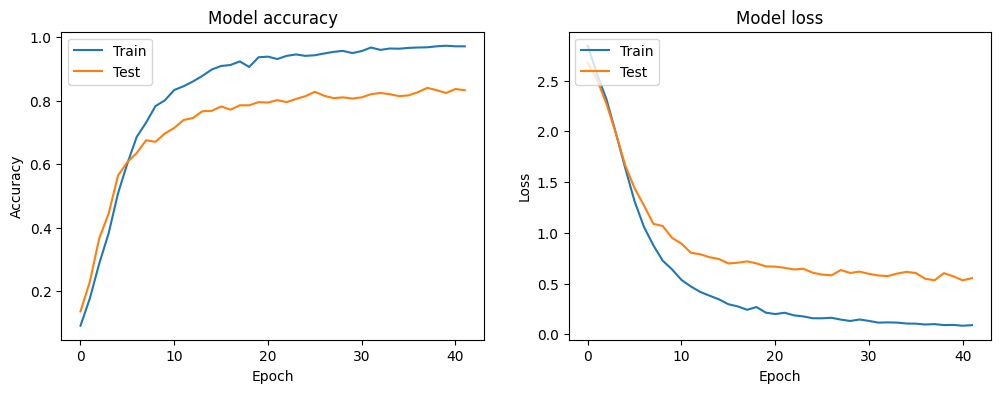

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


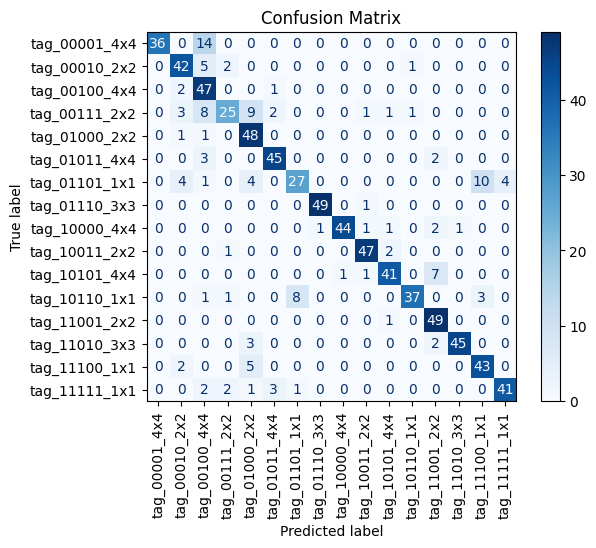

Exactitud del modelo: 83.25%
Tasa de errores: 16.75%


In [66]:
import tensorflow as tf
from functools import partial
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(predictions_train_050_80, labels_050_080, epochs=100, validation_data=(predictions_test_050_080, labels_test_050_080), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(predictions_test_050_080)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_test_050_080, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")


c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.0754 - loss: 3.1561 - val_accuracy: 0.1462 - val_loss: 2.6039
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.1312 - loss: 2.6799 - val_accuracy: 0.2587 - val_loss: 2.4503
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.2219 - loss: 2.4202 - val_accuracy: 0.3625 - val_loss: 2.2345
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.3219 - loss: 2.2005 - val_accuracy: 0.4675 - val_loss: 2.0070
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.4209 - loss: 1.8870 - val_accuracy: 0.4963 - val_loss: 1.7527
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5294 - loss: 1.6023 - val_accuracy: 0.5763 - val_loss: 1.5466
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.6085 - loss: 1.2763 - val_accuracy: 0.6062 - val_loss: 1.3846
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.6803 - loss: 1.0660 - val_accuracy: 

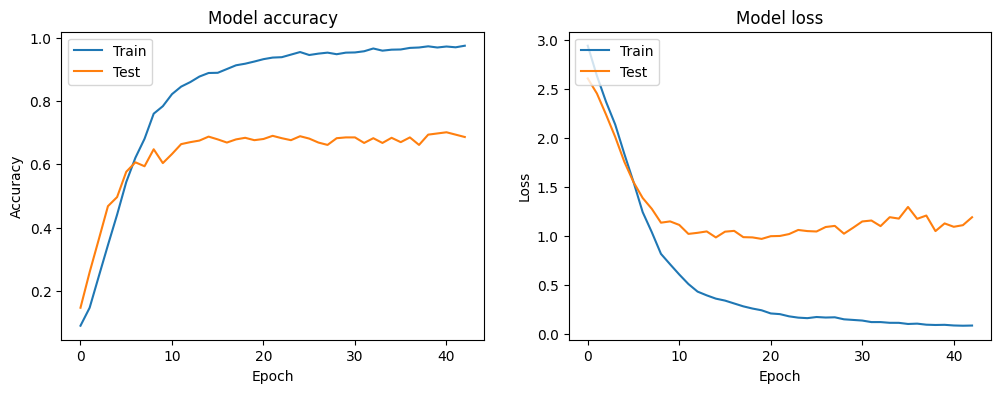

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


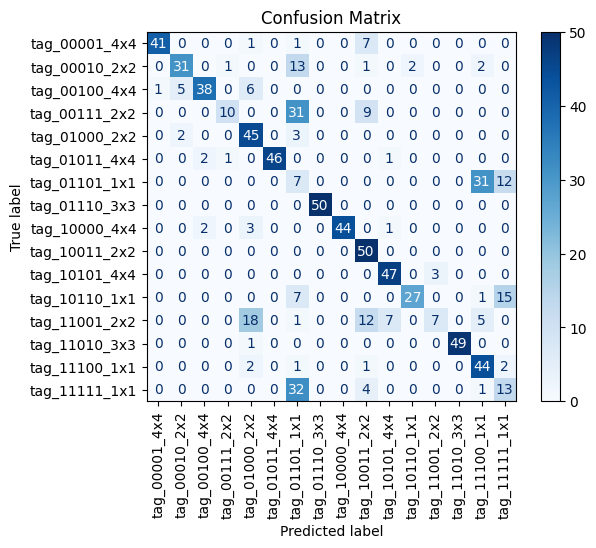

Exactitud del modelo: 68.62%
Tasa de errores: 31.37%


In [67]:
import tensorflow as tf
from functools import partial
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(predictions_train_080_110, labels_080_110, epochs=100, validation_data=(predictions_test_080_110, labels_test_080_110),
                    callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(predictions_test_080_110)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_test_080_110, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")


c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.0879 - loss: 2.9939 - val_accuracy: 0.2188 - val_loss: 2.5375
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.1867 - loss: 2.5262 - val_accuracy: 0.3113 - val_loss: 2.3404
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.2483 - loss: 2.2926 - val_accuracy: 0.4212 - val_loss: 2.1269
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.3505 - loss: 2.0676 - val_accuracy: 0.4938 - val_loss: 1.9174
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4750 - loss: 1.7473 - val_accuracy: 0.5362 - val_loss: 1.7110
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5147 - loss: 1.5584 - val_accuracy: 0.5550 - val_loss: 1.5672
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.5761 - loss: 1.3518 - val_accuracy: 0.5587 - val_loss: 1.4476
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.6458 - loss: 1.1618 - val_accuracy: 

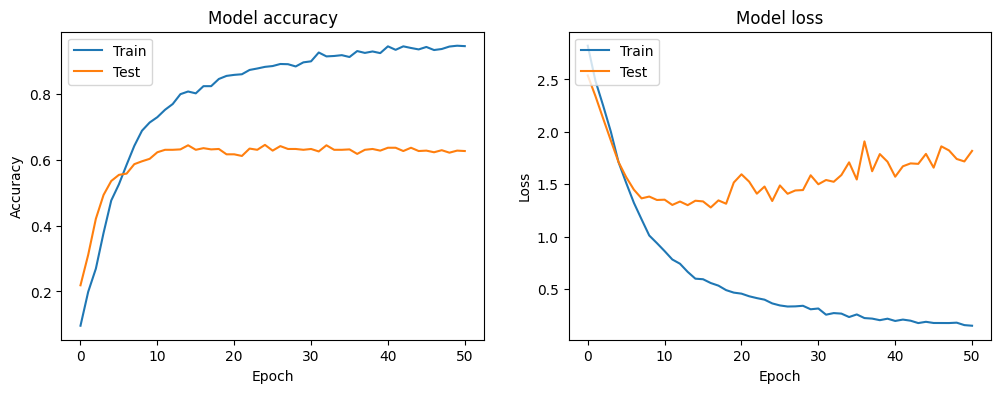

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


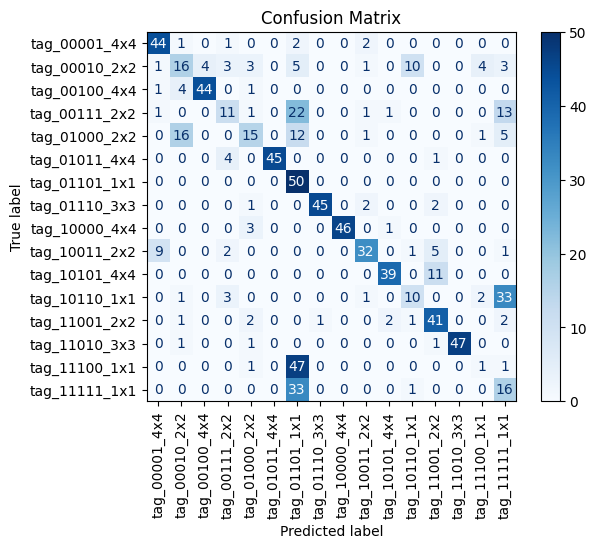

Exactitud del modelo: 62.75%
Tasa de errores: 37.25%


In [68]:
DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(predictions_train_110_140, labels_110_140, epochs=100, validation_data=(predictions_test_110_140, labels_test_110_140),
                    callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(predictions_test_110_140)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_test_110_140, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")